In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime processing
from datetime import datetime

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the Uber dataset
df = pd.read_csv('uber.csv')

# View the first few rows
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# Shape and info
print("Shape of the dataset:", df.shape)
df.info()

# Check for missing values
df.isnull().sum()

Shape of the dataset: (200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
# Convert pickup datetime column to datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract features from datetime
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['pickup_month'] = df['pickup_datetime'].dt.month

In [6]:
# Convert pickup_datetime to datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Drop rows with missing values
df.dropna(inplace=True)

In [7]:
df = df.drop_duplicates()

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date          0
pickup_hour          0
pickup_day           0
pickup_month         0
dtype: int64

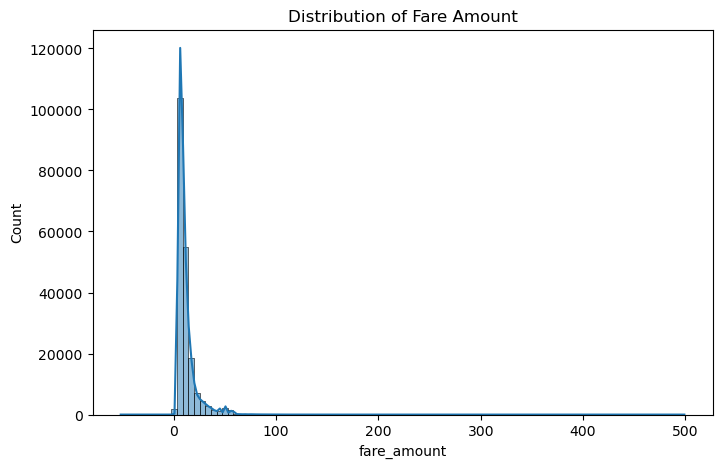

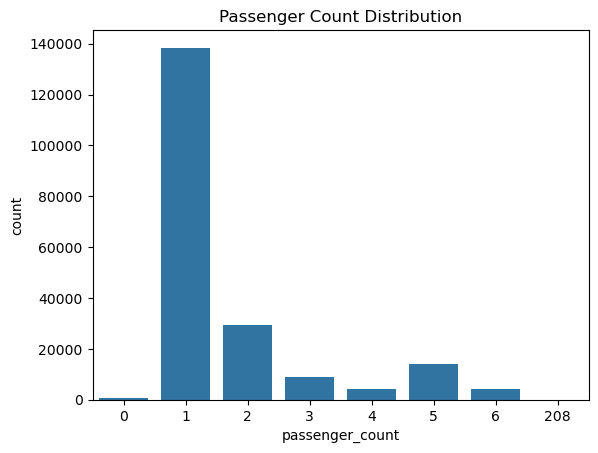

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of fare_amount
plt.figure(figsize=(8, 5))
sns.histplot(df['fare_amount'], bins=100, kde=True)
plt.title('Distribution of Fare Amount')
plt.show()

# Number of passengers
sns.countplot(x='passenger_count', data=df)
plt.title('Passenger Count Distribution')
plt.show()

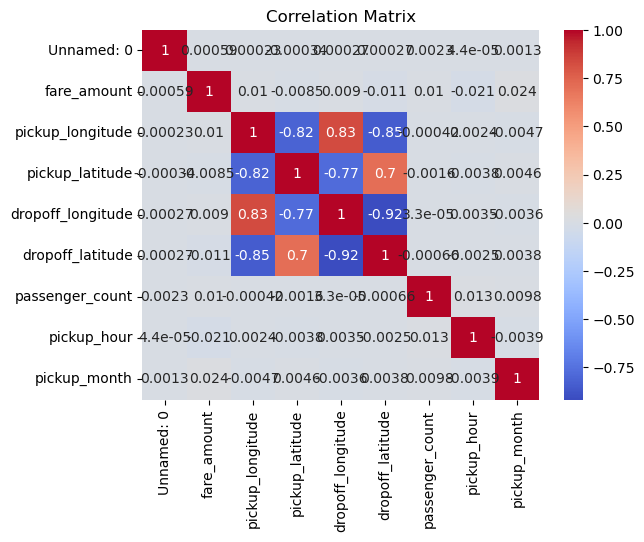

In [11]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

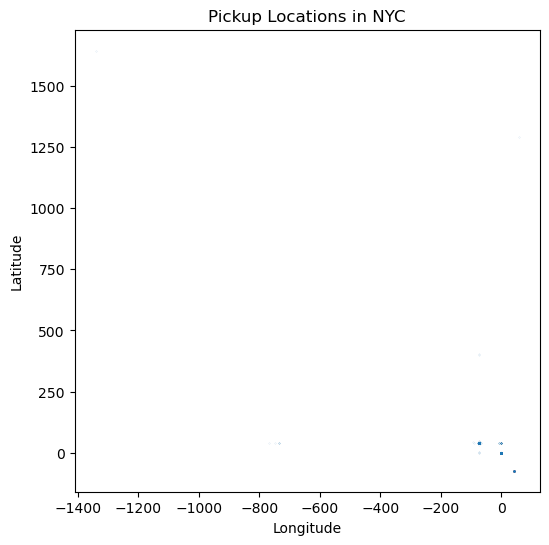

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], s=0.01, alpha=0.5)
plt.title('Pickup Locations in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

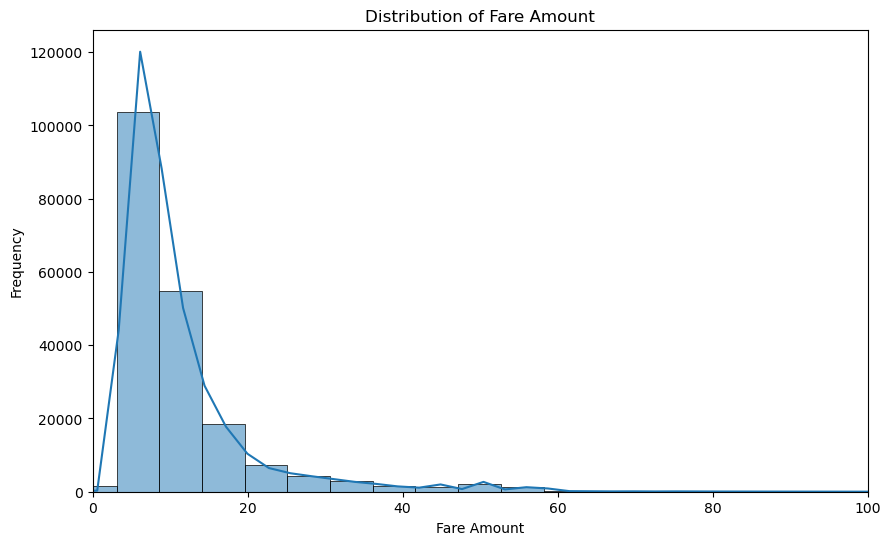

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=100, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Remove extreme outliers for better view
plt.show()

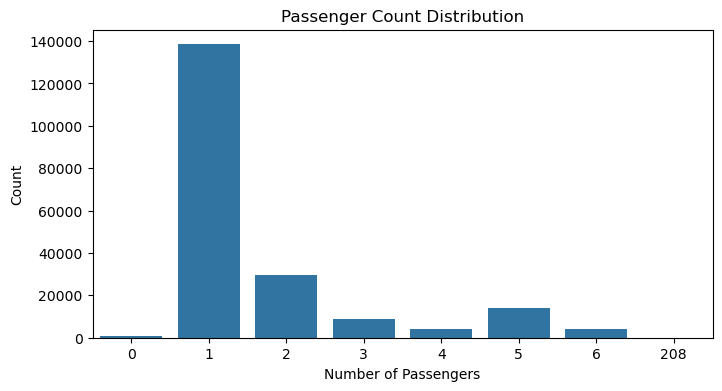

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(x='passenger_count', data=df)
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.show()

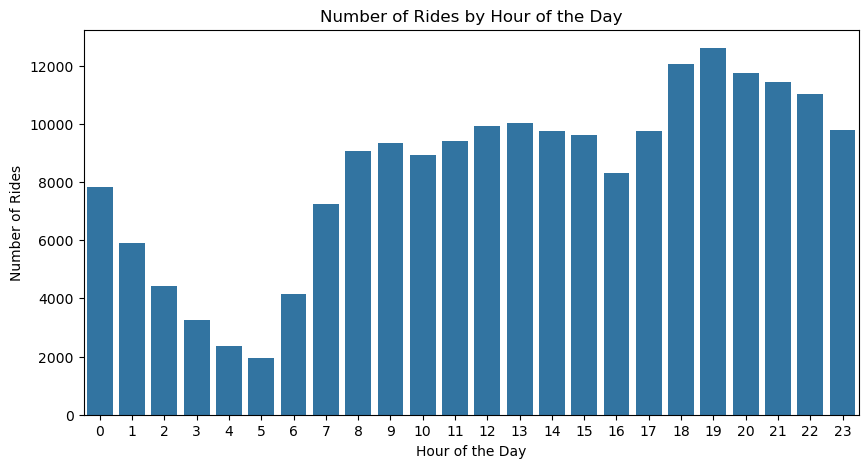

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='pickup_hour', data=df)
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

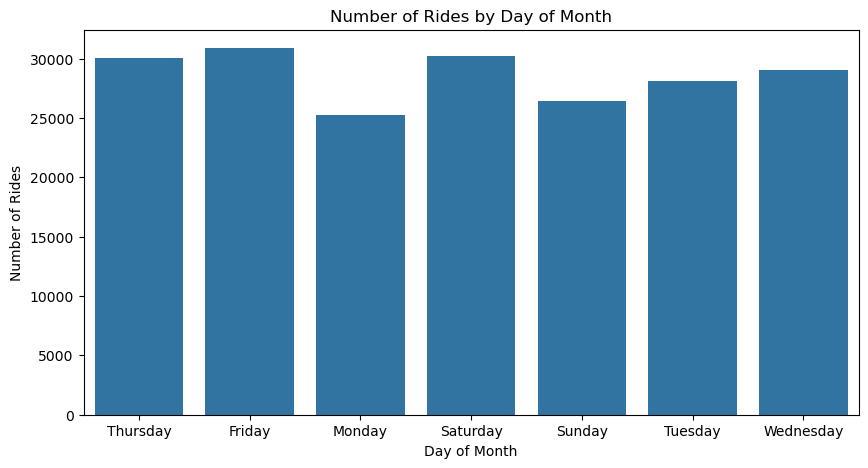

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x='pickup_day', data=df)
plt.title('Number of Rides by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Rides')
plt.show()

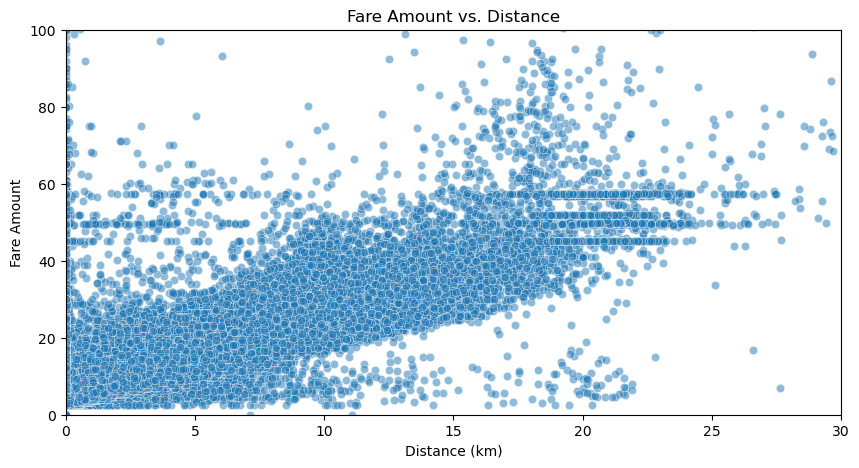

In [17]:
from numpy import radians, sin, cos, sqrt, arctan2

# Haversine Formula to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arctan2(sqrt(a), sqrt(1-a))
    return R * c

# Create new column for distance
df['distance_km'] = haversine(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)

# Scatter Plot: Fare vs Distance
plt.figure(figsize=(10, 5))
sns.scatterplot(x='distance_km', y='fare_amount', data=df, alpha=0.5)
plt.title('Fare Amount vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
plt.xlim(0, 30)
plt.ylim(0, 100)
plt.show()

In [18]:
df['peak_hour'] = df['pickup_hour'].apply(lambda x: 'Peak' if 7 <= x <= 9 or 16 <= x <= 19 else 'Off-Peak')

In [19]:
# Save cleaned dataset to CSV
df.to_csv("cleaned_uber_fares.csv", index=False)

print("✅ Cleaned data saved to cleaned_uber_fares.csv")

✅ Cleaned data saved to cleaned_uber_fares.csv
